In [1]:
import pandas as pd

# Important

Jika ada hal yang dirasa abu-abu, silahkan jawab jawaban dengan asumsi logis yang anda miliki.  
Penilaian tugas tidak hanya sekedar dilihat dari hasil yang dikeluarkan, melainkan penjelasan atas langkah-langkah yang anda ambil dalam analisis. Sertakan penjelasan dengan menggunakan simbol komentar.  
Kualitas seorang Data Analyst yang baik adalah mampu menyampaikan analisis dengan baik.

Definisi data : https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset?select=events.csv  
Kita hanya akan menggunakan file events.csv jadi pastikan kalian telah memahami data dengan baik sebelum mulai mengerjakan homework ini

In [3]:
import os
os.getcwd() # Mengetahui working directory sekarang

'/Users/macair/Documents/jihad/Data Analyst/Growia/Modul 8'

In [5]:
os.listdir() # Melihat daftar file di working directory sekarang

['homeworkPracticalDataAnalytics-230718-135515.ipynb',
 '.DS_Store',
 'dataset',
 '.ipynb_checkpoints']

In [7]:
#Load data csv
df = pd.read_csv('./dataset/events.csv')
df['datetime'] = pd.to_datetime(df['timestamp'],unit='ms') # Data awalnya merupakan linux timestamp, akan dikonversikan menjadi format datetime standard pandas

In [9]:
df['date_key'] = df['datetime'].dt.normalize() # mereset komponen jam pada datetime sehingga hanya menggunakan tanggal

In [11]:
df

timestamp  visitorid event  itemid  transactionid  \
0        1433221332117     257597  view  355908            NaN   
1        1433224214164     992329  view  248676            NaN   
2        1433221999827     111016  view  318965            NaN   
3        1433221955914     483717  view  253185            NaN   
4        1433221337106     951259  view  367447            NaN   
...                ...        ...   ...     ...            ...   
2756096  1438398785939     591435  view  261427            NaN   
2756097  1438399813142     762376  view  115946            NaN   
2756098  1438397820527    1251746  view   78144            NaN   
2756099  1438398530703    1184451  view  283392            NaN   
2756100  1438400163914     199536  view  152913            NaN   

                       datetime   date_key  
0       2015-06-02 05:02:12.117 2015-06-02  
1       2015-06-02 05:50:14.164 2015-06-02  
2       2015-06-02 05:13:19.827 2015-06-02  
3       2015-06-02 05:12:35.914 2015-06-02  
4       2015-06-02 05:02:17.106 2015-06-02  
...                         ...        ...  
2756096 2015-08-01 03:13:05.939 2015-08-01  
2756097 2015-08-01 03:30:13.142 2015-08-01  
2756098 2015-08-01 02:57:00.527 2015-08-01  
2756099 2015-08-01 03:08:50.703 2015-08-01  
2756100 2015-08-01 03:36:03.914 2015-08-01  

[2756101 rows x 7 columns]

In [13]:
#Menampilkan informasi data
print(df.head())
print(df.info())
print(df.describe())

       timestamp  visitorid event  itemid  transactionid  \
0  1433221332117     257597  view  355908            NaN   
1  1433224214164     992329  view  248676            NaN   
2  1433221999827     111016  view  318965            NaN   
3  1433221955914     483717  view  253185            NaN   
4  1433221337106     951259  view  367447            NaN   

                 datetime   date_key  
0 2015-06-02 05:02:12.117 2015-06-02  
1 2015-06-02 05:50:14.164 2015-06-02  
2 2015-06-02 05:13:19.827 2015-06-02  
3 2015-06-02 05:12:35.914 2015-06-02  
4 2015-06-02 05:02:17.106 2015-06-02  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      int64         
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  float64       
 5   datetime       datetime64[ns]
 6   date_key

In [15]:
#menampilkan missing values
missing_values = df.isnull().sum()
print(missing_values)

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
datetime               0
date_key               0
dtype: int64


In [17]:
#mengisi missing values dengan 0
df = df.fillna({'transactionid': '0'})  # Mengisi missing values dengan nilai tertentu

In [19]:
#Memeriksa apakah ada null values
df.isnull().any()

timestamp        False
visitorid        False
event            False
itemid           False
transactionid    False
datetime         False
date_key         False
dtype: bool

In [23]:
#terdapat null values pada kolom transactionid
#menghitung jumlah null values menggunakan fungsi sum
df.isnull().sum()

timestamp        0
visitorid        0
event            0
itemid           0
transactionid    0
datetime         0
date_key         0
dtype: int64

In [25]:
#Melihat data yang memiliki null values
df[df['transactionid'].isna()]

Empty DataFrame
Columns: [timestamp, visitorid, event, itemid, transactionid, datetime, date_key]
Index: []

In [39]:
df

timestamp  visitorid event  itemid transactionid  \
0        1433221332117     257597  view  355908             0   
1        1433224214164     992329  view  248676             0   
2        1433221999827     111016  view  318965             0   
3        1433221955914     483717  view  253185             0   
4        1433221337106     951259  view  367447             0   
...                ...        ...   ...     ...           ...   
2756096  1438398785939     591435  view  261427             0   
2756097  1438399813142     762376  view  115946             0   
2756098  1438397820527    1251746  view   78144             0   
2756099  1438398530703    1184451  view  283392             0   
2756100  1438400163914     199536  view  152913             0   

                       datetime   date_key  
0       2015-06-02 05:02:12.117 2015-06-02  
1       2015-06-02 05:50:14.164 2015-06-02  
2       2015-06-02 05:13:19.827 2015-06-02  
3       2015-06-02 05:12:35.914 2015-06-02  
4       2015-06-02 05:02:17.106 2015-06-02  
...                         ...        ...  
2756096 2015-08-01 03:13:05.939 2015-08-01  
2756097 2015-08-01 03:30:13.142 2015-08-01  
2756098 2015-08-01 02:57:00.527 2015-08-01  
2756099 2015-08-01 03:08:50.703 2015-08-01  
2756100 2015-08-01 03:36:03.914 2015-08-01  

[2755641 rows x 7 columns]

In [27]:
#Mengecek data type
df.dtypes

timestamp                 int64
visitorid                 int64
event                    object
itemid                    int64
transactionid            object
datetime         datetime64[ns]
date_key         datetime64[ns]
dtype: object

<Axes: ylabel='event'>

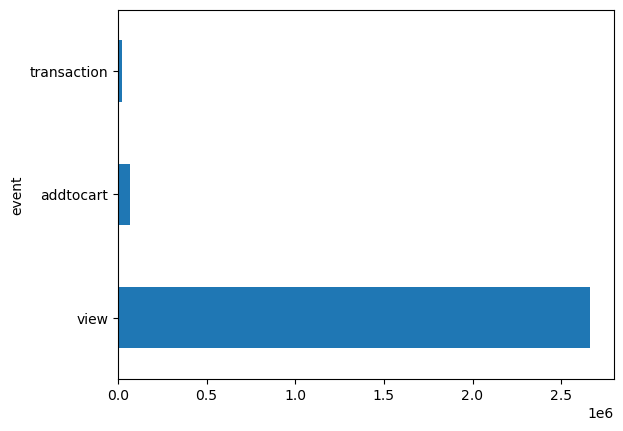

In [41]:
#Melihat jumlah event berdasarkan jenis
df['event'].value_counts().plot(kind='barh')

In [29]:
# Filter hanya untuk events yang mengandung view, addtocart, transaction
df_filtered = df[df['event'].isin(['view', 'addtocart', 'transaction'])]

In [31]:
# Convert timestamp to datetime and create date_key
df_filtered['timestamp'] = pd.to_datetime(df_filtered['timestamp'], unit='ms')
df_filtered['date_key'] = df_filtered['timestamp'].dt.date


In [33]:
# Group by date_key, itemid and calculate the number of events
df_grouped = df_filtered.groupby(['date_key', 'itemid', 'event']).size().unstack(fill_value=0)
df_grouped = df_grouped.reset_index().fillna(0)

In [35]:
# Ensure columns exist
for col in ['addtocart', 'transaction', 'view']:
    if col not in df_grouped.columns:
        df_grouped[col] = 0

df_grouped = df_grouped[['date_key', 'itemid', 'addtocart', 'transaction', 'view']]

In [39]:
df_grouped

event      date_key  itemid  addtocart  transaction  view
0        2015-05-03      16          0            0     1
1        2015-05-03      19          0            0     1
2        2015-05-03      32          0            0     1
3        2015-05-03      33          1            0     1
4        2015-05-03      42          0            0     1
...             ...     ...        ...          ...   ...
1672181  2015-09-18  464474          0            0     2
1672182  2015-09-18  464538          0            0     1
1672183  2015-09-18  465387          0            0     1
1672184  2015-09-18  466321          0            0     1
1672185  2015-09-18  466436          0            0     1

[1672186 rows x 5 columns]

In [37]:
df_grouped.sort_values('transaction')

event      date_key  itemid  addtocart  transaction  view
0        2015-05-03      16          0            0     1
1111440  2015-07-30   48460          0            0     1
1111439  2015-07-30   48451          0            0     1
1111438  2015-07-30   48425          0            0     2
1111436  2015-07-30   48360          0            0     1
...             ...     ...        ...          ...   ...
1463585  2015-08-30  173653          7            6    21
936990   2015-07-16  445351          7            6    42
1405839  2015-08-25  134484          6            6    17
1408811  2015-08-25  248455          7            6    45
49359    2015-05-07   51354          9            8    94

[1672186 rows x 5 columns]

In [43]:
df_grouped.shape

(1672186, 5)

In [45]:
print(df_grouped.head())
print(df_grouped.info())

event    date_key  itemid  addtocart  transaction  view
0      2015-05-03      16          0            0     1
1      2015-05-03      19          0            0     1
2      2015-05-03      32          0            0     1
3      2015-05-03      33          1            0     1
4      2015-05-03      42          0            0     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672186 entries, 0 to 1672185
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   date_key     1672186 non-null  object
 1   itemid       1672186 non-null  int64 
 2   addtocart    1672186 non-null  int64 
 3   transaction  1672186 non-null  int64 
 4   view         1672186 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 63.8+ MB
None


# 1. Data Preprocessing
Data pada level transaksi dan belum siap digunakan untuk analisis harian.  
Lakukan data preprocessing dengan pandas sesuai dengan materi yang sudah ada pelajari sehingga data di rekap dalam level harian untuk setiap itemid seperti berikut : 

In [47]:
df_grouped.describe()

event        itemid     addtocart   transaction          view
count  1.672186e+06  1.672186e+06  1.672186e+06  1.672186e+06
mean   2.339858e+05  4.146189e-02  1.342973e-02  1.593311e+00
std    1.342573e+05  2.535295e-01  1.262840e-01  1.832306e+00
min    3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    1.170030e+05  0.000000e+00  0.000000e+00  1.000000e+00
50%    2.343790e+05  0.000000e+00  0.000000e+00  1.000000e+00
75%    3.501950e+05  0.000000e+00  0.000000e+00  2.000000e+00
max    4.668670e+05  3.200000e+01  8.000000e+00  3.330000e+02

In [49]:
# TULIS CODE ANDA DISINI
# Membulatkan angka dalam dataframe ke 1 angka di belakang koma
# Konversi kolom ke format float jika belum dalam format numerik
df_grouped['addtocart'] = df_grouped['addtocart'].astype(float)
df_grouped['transaction'] = df_grouped['transaction'].astype(float)
df_grouped['view'] = df_grouped['view'].astype(float)

df_daily = df_grouped.round({'addtocart': 1, 'transaction': 1, 'view': 1}) # tidak harus 1 line saja
df_daily

event      date_key  itemid  addtocart  transaction  view
0        2015-05-03      16        0.0          0.0   1.0
1        2015-05-03      19        0.0          0.0   1.0
2        2015-05-03      32        0.0          0.0   1.0
3        2015-05-03      33        1.0          0.0   1.0
4        2015-05-03      42        0.0          0.0   1.0
...             ...     ...        ...          ...   ...
1672181  2015-09-18  464474        0.0          0.0   2.0
1672182  2015-09-18  464538        0.0          0.0   1.0
1672183  2015-09-18  465387        0.0          0.0   1.0
1672184  2015-09-18  466321        0.0          0.0   1.0
1672185  2015-09-18  466436        0.0          0.0   1.0

[1672186 rows x 5 columns]

In [51]:
#Cek table
df_daily.sort_values('transaction')

event      date_key  itemid  addtocart  transaction  view
0        2015-05-03      16        0.0          0.0   1.0
1111440  2015-07-30   48460        0.0          0.0   1.0
1111439  2015-07-30   48451        0.0          0.0   1.0
1111438  2015-07-30   48425        0.0          0.0   2.0
1111436  2015-07-30   48360        0.0          0.0   1.0
...             ...     ...        ...          ...   ...
1463585  2015-08-30  173653        7.0          6.0  21.0
936990   2015-07-16  445351        7.0          6.0  42.0
1405839  2015-08-25  134484        6.0          6.0  17.0
1408811  2015-08-25  248455        7.0          6.0  45.0
49359    2015-05-07   51354        9.0          8.0  94.0

[1672186 rows x 5 columns]

In [27]:
# CODE INI JANGAN DI RUN DULU
df_daily.sort_values('transaction')

event     date_key  itemid  addtocart  transaction  view
0       2015-05-03      16        0.0          0.0   1.0
1111440 2015-07-30   48460        0.0          0.0   1.0
1111439 2015-07-30   48451        0.0          0.0   1.0
1111438 2015-07-30   48425        0.0          0.0   2.0
1111436 2015-07-30   48360        0.0          0.0   1.0
...            ...     ...        ...          ...   ...
1463585 2015-08-30  173653        7.0          6.0  21.0
936990  2015-07-16  445351        7.0          6.0  42.0
1405839 2015-08-25  134484        6.0          6.0  17.0
1408811 2015-08-25  248455        7.0          6.0  45.0
49359   2015-05-07   51354        9.0          8.0  94.0

[1672186 rows x 5 columns]

# 2. Data Analysis
Gunakan df_daily sesuai soal nomor 1.  
Apabila tidak bisa menjawab soal nomor 1, harap gunakan file df_daily_item_activity.csv sebagai penggantinya.

## 2.a Setelah melakukan rekap harian per produk, coba lakukan rekap harian secara total.  
Rekap harian secara total artinya hitung berapa banyak total view yang terjadi, total addtocart yang terjadi dan total transaction yang terjadi di setiap harinya

## 2.b Setelah membuat rekap harian secara total, buatlah visualisasi yang menggambarkan pergerakan setiap event di setiap harinya dan BERIKAN MINIMAL 2 INSIGHT/ANALISIS dari grafik.

## 2.c Apakah ada kendala dari proses addtocard hingga customer melakukan transaction? Gunakan funnel analysis untuk mencari tahu.

In [53]:
#2.a Setelah melakukan rekap harian per produk, coba lakukan rekap harian secara total.
#Rekap harian secara total artinya hitung berapa banyak total view yang terjadi, total addtocart yang terjadi dan total transaction yang terjadi di setiap harinya
# Melakukan rekap harian secara total
rekap_harian_total = df_daily.groupby('date_key').sum().reset_index()

# Membulatkan hasil rekap ke 1 angka di belakang koma
rekap_harian_total = rekap_harian_total.round({'addtocart': 1, 'transaction': 1, 'view': 1})

In [55]:
rekap_harian_total

event    date_key      itemid  addtocart  transaction     view
0      2015-05-03  2069043371      296.0         83.0  13304.0
1      2015-05-04  2717916089      579.0        154.0  18681.0
2      2015-05-05  3181406676      565.0        225.0  22225.0
3      2015-05-06  3232508591      647.0        258.0  23015.0
4      2015-05-07  3193888544      578.0        217.0  22369.0
..            ...         ...        ...          ...      ...
134    2015-09-14  3054518078      475.0        154.0  20284.0
135    2015-09-15  2864454690      595.0        158.0  19674.0
136    2015-09-16  1818941835      336.0        137.0  11022.0
137    2015-09-17  1629461146      253.0         45.0   9830.0
138    2015-09-18   280365054       34.0         15.0   1479.0

[139 rows x 5 columns]

In [57]:
#2.b Setelah membuat rekap harian secara total, buatlah visualisasi yang menggambarkan pergerakan setiap event di setiap harinya 
#dan BERIKAN MINIMAL 2 INSIGHT/ANALISIS dari grafik.¶
import matplotlib.pyplot as plt
import seaborn as sns

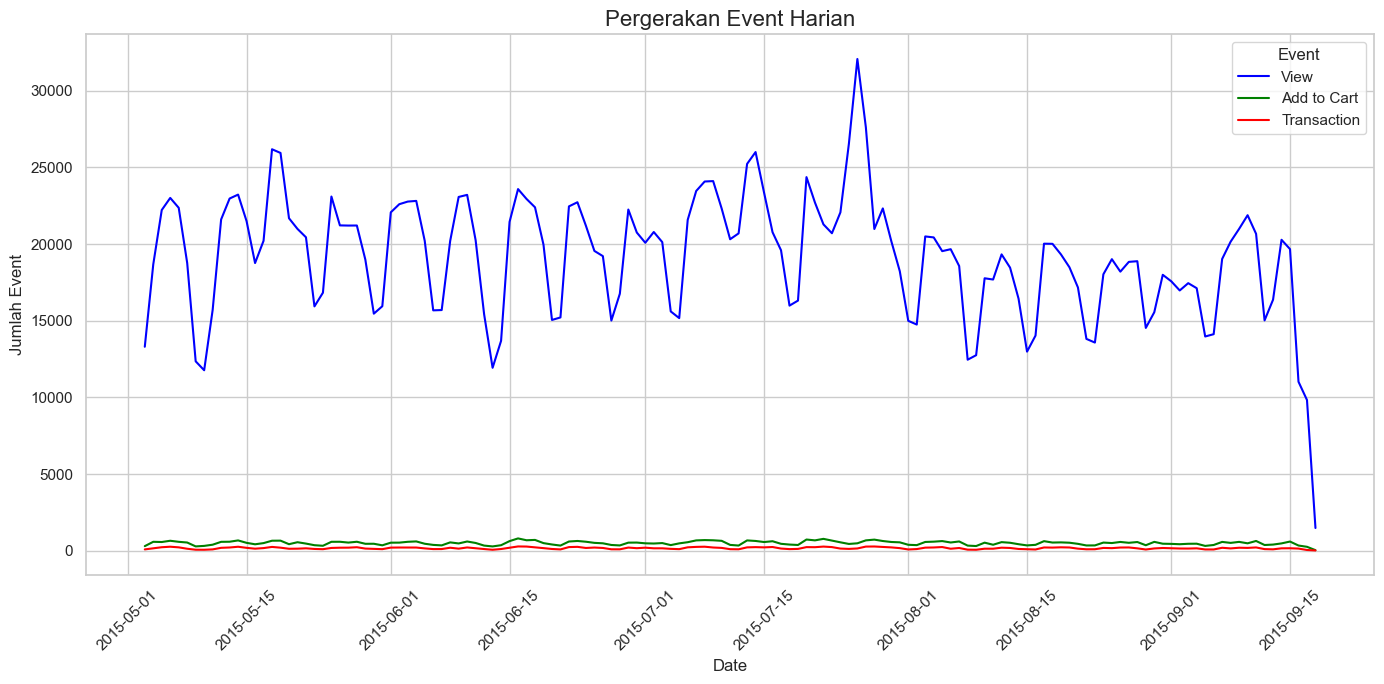

In [59]:
# Set the style of the visualizations
sns.set(style="whitegrid")

# Plot line for each event
plt.figure(figsize=(14, 7))

# Plotting views
sns.lineplot(x='date_key', y='view', data=rekap_harian_total, label='View', color='blue')

# Plotting addtocart
sns.lineplot(x='date_key', y='addtocart', data=rekap_harian_total, label='Add to Cart', color='green')

# Plotting transaction
sns.lineplot(x='date_key', y='transaction', data=rekap_harian_total, label='Transaction', color='red')

# Setting titles and labels
plt.title('Pergerakan Event Harian', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Jumlah Event', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Event')
plt.tight_layout()

# Show the plot
plt.show()


In [62]:
#Apakah ada kendala dari proses addtocard hingga customer melakukan transaction? Gunakan funnel analysis untuk mencari tahu.
# Menghitung total jumlah event pada setiap tahap
total_views = rekap_harian_total['view'].sum()
total_addtocart = rekap_harian_total['addtocart'].sum()
total_transactions = rekap_harian_total['transaction'].sum()

# Menampilkan hasil perhitungan
print(f"Total Views: {total_views}")
print(f"Total Add to Cart: {total_addtocart}")
print(f"Total Transactions: {total_transactions}")

Total Views: 2664312.0
Total Add to Cart: 69332.0
Total Transactions: 22457.0


In [64]:
# Menghitung conversion rate
conversion_rate_addtocart = (total_addtocart / total_views) * 100
conversion_rate_transaction = (total_transactions / total_addtocart) * 100

# Menampilkan conversion rate
print(f"Conversion Rate from View to Add to Cart: {conversion_rate_addtocart:.2f}%")
print(f"Conversion Rate from Add to Cart to Transaction: {conversion_rate_transaction:.2f}%")

Conversion Rate from View to Add to Cart: 2.60%
Conversion Rate from Add to Cart to Transaction: 32.39%


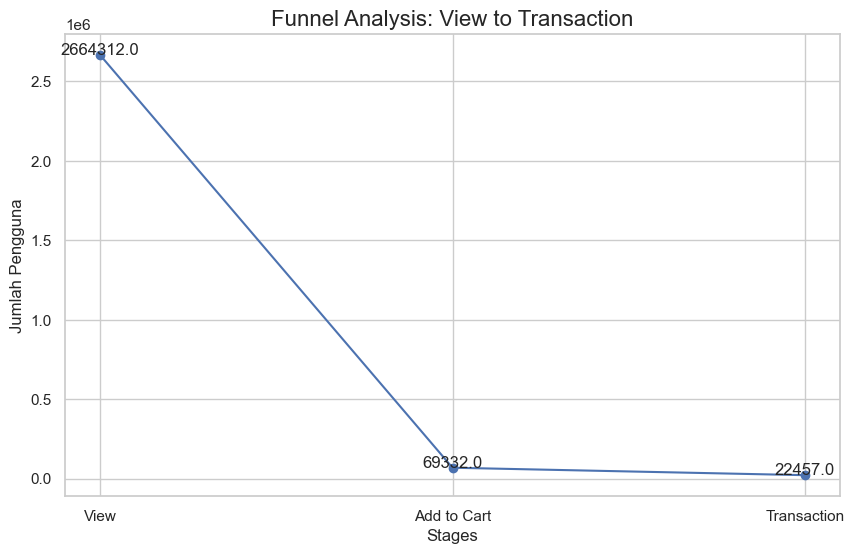

In [66]:
# Menggunakan matplotlib untuk visualisasi funnel
stages = ['View', 'Add to Cart', 'Transaction']
values = [total_views, total_addtocart, total_transactions]

plt.figure(figsize=(10, 6))
plt.plot(stages, values, marker='o', linestyle='-', color='b')

# Annotate values
for i, value in enumerate(values):
    plt.text(i, value + 1000, f'{value}', ha='center', fontsize=12)

plt.title('Funnel Analysis: View to Transaction', fontsize=16)
plt.xlabel('Stages', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.show()

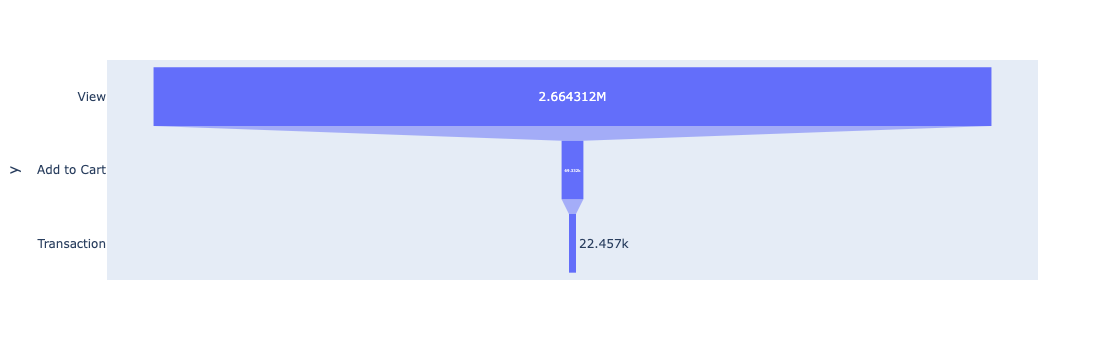

In [74]:
import plotly.express as px
# Create a funnel chart
fig = px.funnel(rekap_harian_total, y= stages, x= values)

# Display the chart
fig.show()

# 3. RF Analysis

Karena pada data ini tidak ada informasi mengenai nilai dari item yang dibeli, maka analisis akan mengabaikan komponen M.

## 3.a Hitunglah sudah berapa hari sejak customer terakhir kali melakukan transaksi. 
Output data yang diharapkan adalah dataframe dengan 2 kolom, yakni visitorid dan juga sudah berapa hari sejak transaksi berlalu

## 3.b berdasarkan hasil sebelumnya, bagi customer menjadi 4 kelompok berdasarkan aspek waktu transaksi terakhir.

In [78]:
df

timestamp  visitorid event  itemid transactionid  \
0        1433221332117     257597  view  355908             0   
1        1433224214164     992329  view  248676             0   
2        1433221999827     111016  view  318965             0   
3        1433221955914     483717  view  253185             0   
4        1433221337106     951259  view  367447             0   
...                ...        ...   ...     ...           ...   
2756096  1438398785939     591435  view  261427             0   
2756097  1438399813142     762376  view  115946             0   
2756098  1438397820527    1251746  view   78144             0   
2756099  1438398530703    1184451  view  283392             0   
2756100  1438400163914     199536  view  152913             0   

                       datetime   date_key  
0       2015-06-02 05:02:12.117 2015-06-02  
1       2015-06-02 05:50:14.164 2015-06-02  
2       2015-06-02 05:13:19.827 2015-06-02  
3       2015-06-02 05:12:35.914 2015-06-02  
4       2015-06-02 05:02:17.106 2015-06-02  
...                         ...        ...  
2756096 2015-08-01 03:13:05.939 2015-08-01  
2756097 2015-08-01 03:30:13.142 2015-08-01  
2756098 2015-08-01 02:57:00.527 2015-08-01  
2756099 2015-08-01 03:08:50.703 2015-08-01  
2756100 2015-08-01 03:36:03.914 2015-08-01  

[2756101 rows x 7 columns]

In [82]:
last_transaction = valid_transactions.groupby('visitorid')['datetime'].max().reset_index()

In [84]:
last_transaction

visitorid                datetime
0                0 2015-09-11 20:55:17.175
1                1 2015-08-13 17:46:06.444
2                2 2015-08-07 18:20:57.845
3                3 2015-08-01 07:10:35.296
4                4 2015-09-15 21:24:27.167
...            ...                     ...
1407575    1407575 2015-06-10 21:46:08.922
1407576    1407576 2015-06-03 15:01:29.991
1407577    1407577 2015-05-17 21:48:04.867
1407578    1407578 2015-05-17 01:21:23.288
1407579    1407579 2015-06-24 22:22:06.978

[1407580 rows x 2 columns]

In [116]:
# 3.a Hitunglah sudah berapa hari sejak customer terakhir kali melakukan transaksi.
# Output data yang diharapkan adalah dataframe dengan 2 kolom, yakni visitorid dan juga sudah berapa hari sejak transaksi berlalu

import pandas as pd
from datetime import datetime

# Filter hanya transaksi yang valid (transactionid != 0)
valid_transactions = df[df['transactionid'] != 0]
valid_transactions = df.sort_values('date_key').groupby('visitorid').tail(1)
# Pilih transaksi terakhir untuk setiap visitorid
latest_date = valid_transactions['date_key'].max()
# last_transaction = valid_transactions.groupby('visitorid')['datetime'].max().reset_index()
valid_transactions['days_since_last_transaction'] = latest_date - valid_transactions['date_key']
valid_transactions['days_since_last_transaction']

# # Hitung selisih hari antara tanggal transaksi terakhir dan tanggal saat ini
# last_transaction['days_since_last_transaction'] = (datetime.now() - pd.to_datetime(last_transaction['datetime'])).dt.days

# Tampilkan hasilnya
# print(last_transaction[['visitorid', 'days_to_today']])


1481859   138 days
1474525   138 days
1474526   138 days
1474529   138 days
1474532   138 days
            ...   
1459306     0 days
1459307     0 days
1459308     0 days
1459289     0 days
1462517     0 days
Name: days_since_last_transaction, Length: 1407580, dtype: timedelta64[ns]

In [124]:
valid_transactions['days_since_last_transaction']= valid_transactions['days_since_last_transaction'].dt.days # mengubah timedelta menjadi integer

<Axes: ylabel='Frequency'>

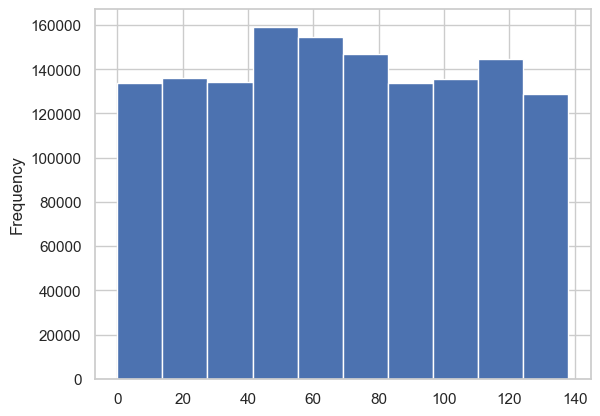

In [126]:
df_recency = valid_transactions[['visitorid','days_since_last_transaction']]
df_recency['days_since_last_transaction'].plot(kind='hist')

In [132]:
# 3.b berdasarkan hasil sebelumnya, bagi customer menjadi 4 kelompok berdasarkan aspek waktu transaksi terakhir.¶
df_recency['R_score'] = pd.qcut(df_recency['days_since_last_transaction'],4,labels=['4','3','2','1'])

/var/folders/gq/y63881xd0p95xkmph7t_jdvh0000gp/T/ipykernel_1586/32023419.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
df_recency

visitorid  days_since_last_transaction R_score
1481859     689859                          138       1
1474525     935582                          138       1
1474526     696326                          138       1
1474529     596477                          138       1
1474532    1020587                          138       1
...            ...                          ...     ...
1459306     699799                            0       4
1459307     362806                            0       4
1459308      85274                            0       4
1459289     637990                            0       4
1462517     157029                            0       4

[1407580 rows x 3 columns]

In [82]:
# CONTOH HASIL
latest_transaction

visitorid  days_since_last_transaction R_score
1465072     869008                          138       1
1463096     345781                          138       1
1464289     586756                          138       1
1463462     435495                          138       1
1464041     266417                          138       1
...            ...                          ...     ...
1456595     751256                            0       4
1460839    1298462                            0       4
1457781      62004                            0       4
1457810     427756                            0       4
1454084     152963                            0       4

[11719 rows x 3 columns]

# 3.c Hitunglah banyaknya transaksi yang dilakukan oleh setiap uservisitor 
Output data yang diharapkan adalah dataframe dengan 2 kolom, yakni visitorid dan juga sudah berapa banyak transaksi yang telah dilakukan

# 3.d berdasarkan hasil sebelumnya, bagi customer menjadi 4 kelompok berdasarkan banyaknya transaksi yang dilakukan

In [162]:
valid_transactions = df[df['transactionid'] != 0]

In [226]:
# 3.c Hitunglah banyaknya transaksi yang dilakukan oleh setiap uservisitor
# Output data yang diharapkan adalah dataframe dengan 2 kolom, yakni visitorid dan juga sudah berapa banyak transaksi yang telah dilakukan
import pandas as pd

# Filter transaksi yang valid
valid_transactions = df[df['transactionid'] != 0]

# Hitung banyaknya transaksi per visitorid
transaction_counts = valid_transactions.groupby('visitorid').size().reset_index(name='transaction_count')

# Tampilkan hasilnya
transaction_counts


visitorid  transaction_count
0                0                  3
1                1                  1
2                2                  8
3                3                  1
4                4                  1
...            ...                ...
1407575    1407575                  1
1407576    1407576                  1
1407577    1407577                  1
1407578    1407578                  1
1407579    1407579                  1

[1407580 rows x 2 columns]

In [228]:
# Mengelompokkan customer ke dalam 4 kelompok berdasarkan banyaknya transaksi
transaction_counts['group'] = pd.cut(transaction_counts['transaction_count'], bins=4, labels=["1", "2", "3", "4"])

In [230]:
transaction_counts['group'].value_counts()

group
1    1407570
2          8
3          1
4          1
Name: count, dtype: int64

In [232]:
transaction_counts.groupby('group').agg({'transaction_count':['min','max','mean','median','count']})

/var/folders/gq/y63881xd0p95xkmph7t_jdvh0000gp/T/ipykernel_1586/1855461960.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



transaction_count                                    
                    min   max         mean  median    count
group                                                      
1                     1  1934     1.936137     1.0  1407570
2                  1991  3024  2345.750000  2298.5        8
3                  4328  4328  4328.000000  4328.0        1
4                  7757  7757  7757.000000  7757.0        1

In [ ]:
# import numpy as np
# transaction_counts['group'] = pd.cut(df_frequency['transaction_count'],bins=[0,,25,np.Inf],labels=['Low','Medium','High'],right=True)

# 3.e gabungkan hasil 3.b dan 3.d kedalam suatu dataframe dan lakukan analisis mengenai karakteristik customers dari aspek RF. Apa yang bisa disimpulkan ?

In [234]:
recency = df_recency.set_index('visitorid')['R_score']
frequency = transaction_counts['group']

In [236]:
df_rfm = pd.concat([recency,frequency],axis=1)

In [238]:
df_rfm

R_score group
689859        1     1
935582        1     1
696326        1     1
596477        1     1
1020587       1     1
...         ...   ...
699799        4     1
362806        4     1
85274         4     1
637990        4     1
157029        4     1

[1407580 rows x 2 columns]